In [4]:
from sklearn.preprocessing import OneHotEncoder
import seaborn as sb
import numpy as np
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
from pylab import rcParams
import pandas as pd


In [25]:
def get_standard_norm(series):
    # price = price.loc[outlier:len(data)-outlier, :]
    mean = np.mean(series)   # 17.41
    std = np.std(series)     # 2.94

    price_pdf = stats.norm.pdf(series.sort_values(), mean, std)
    
    # plt.plot(series.sort_values(), price_pdf, color="Black", label="Cultivar_A")
    # sb.histplot(data = series, color="Black",stat = "probability",alpha=0.3)
    
    return price_pdf

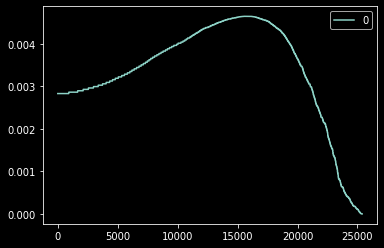

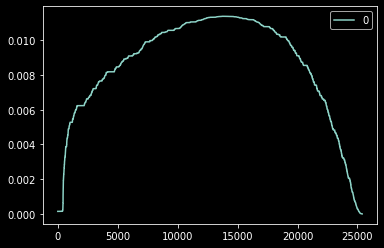

                  0
count  2.539200e+04
mean   3.375520e-03
std    1.181545e-03
min    7.780628e-07
25%    2.931636e-03
50%    3.569920e-03
75%    4.347440e-03
max    4.652647e-03
                  0
count  2.539200e+04
mean   8.498698e-03
std    3.026260e-03
min    9.763694e-16
25%    6.916225e-03
50%    9.493580e-03
75%    1.093105e-02
max    1.137678e-02


In [70]:
data = pd.read_csv('onehot_sample.csv')
data = data.sort_values(by=['lead_time'])

lead_time_pdf = get_standard_norm(data['lead_time'])
avg_price_per_room_pdf = get_standard_norm(data['avg_price_per_room'])
lead_time_pdf = pd.DataFrame(lead_time_pdf)
avg_price_per_room_pdf = pd.DataFrame(avg_price_per_room_pdf)

lead_time_pdf.plot()
# plt.figure(figsize=(15, 15))
# plt.title("lead_time")
plt.show()

avg_price_per_room_pdf.plot()
plt.show()

print(lead_time_pdf.describe())
print(avg_price_per_room_pdf.describe())

In [72]:
lead_time_pdf
count_under_iqr_1 = 0
count_under_iqr_2 = 0
count_under_iqr_3 = 0
count_upper_iqr_4 = 0

for i in range(len(lead_time_pdf)):
    if lead_time_pdf.loc[i, 0] < 2.931636e-03:
        data['lead_time_under_iqr_1'] = 1
    else:
        data['lead_time_under_iqr_1'] = 0
        
    if 2.931636e-03 < lead_time_pdf.loc[i, 0] < 3.569920e-03:
        data['lead_time_under_iqr_2'] = 1
    else:
        data['lead_time_under_iqr_2'] = 0
        
    if 3.569920e-03 < lead_time_pdf.loc[i, 0] < 4.347440e-03:
        data['lead_time_under_iqr_3'] = 1
    else:
        data['lead_time_under_iqr_3'] = 0
        
    if 4.347440e-03 < lead_time_pdf.loc[i, 0]:
        data['lead_time_upper_iqr_3'] = 1
    else:
        data['lead_time_upper_iqr_3'] = 0
print(count_under_iqr_1)
print(count_under_iqr_2)
print(count_under_iqr_3)
print(count_upper_iqr_4)
data.to_csv('temp.csv', index=False)


0
0
0
0


In [75]:
data = pd.read_csv('temp.csv')
data = data.sort_values(by=['avg_price_per_room'])


for i in range(len(avg_price_per_room_pdf)):
    if avg_price_per_room_pdf.loc[i, 0] < 6.916225e-03:
        data['price_under_iqr_1'] = 1
    else:
        data['price_under_iqr_1'] = 0

    if 6.916225e-03 < avg_price_per_room_pdf.loc[i, 0] < 9.493580e-03:
        data['price_under_iqr_2'] = 1
    else:
        data['price_under_iqr_2'] = 0

    if 9.493580e-03 < avg_price_per_room_pdf.loc[i, 0] < 1.093105e-02:
        data['price_under_iqr_3'] = 1
    else:
        data['price_under_iqr_3'] = 0

    if 1.093105e-02 < avg_price_per_room_pdf.loc[i, 0]:
        data['price_upper_iqr_3'] = 1
    else:
        data['price_upper_iqr_3'] = 0

data.to_csv('conti_to_dis_train.csv', index = False)
